In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [25]:
taxi_jan_2024 = pd.read_parquet('data/yellow_tripdata_2024-01.parquet')
taxi_feb_2024= pd.read_parquet('data/yellow_tripdata_2024-02.parquet')
taxi_march_2024=pd.read_parquet('data/yellow_tripdata_2024-03.parquet')
taxi_df = pd.concat([taxi_jan_2024,taxi_feb_2024,taxi_march_2024])

# EDA

In [26]:
taxi_df


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582623,2,2024-03-31 23:16:45,2024-03-31 23:29:20,NaN,4.27,NaN,None,130,218,0,14.27,0.0,0.5,0.00,0.0,1.0,15.77,NaN,NaN
3582624,1,2024-03-31 23:29:28,2024-03-31 23:43:47,NaN,0.00,NaN,None,79,100,0,14.00,1.0,0.5,3.80,0.0,1.0,24.80,NaN,NaN
3582625,2,2024-03-31 23:15:00,2024-03-31 23:47:29,NaN,6.44,NaN,None,63,181,0,30.00,0.0,0.5,0.00,0.0,1.0,31.50,NaN,NaN
3582626,2,2024-03-31 23:27:53,2024-03-31 23:45:44,NaN,3.88,NaN,None,161,148,0,22.32,0.0,0.5,5.26,0.0,1.0,31.58,NaN,NaN


In [27]:
taxi_df.shape

(9554778, 19)

In [28]:
taxi_df.columns



Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [29]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','total_amount']]

In [30]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


In [31]:
taxi_df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,9554778,9554778,8.802816e+06,9.554778e+06,8.802816e+06,9.554778e+06,9.554778e+06,9.554778e+06,9.554778e+06
mean,2024-02-17 17:20:27.204720128,2024-02-17 17:36:34.800668160,1.334410e+00,4.042286e+00,2.150900e+00,1.652033e+02,1.641875e+02,1.121388e+00,2.686540e+01
min,2002-12-31 22:17:10,2002-12-31 22:42:24,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+03
25%,2024-01-26 09:55:41.249999872,2024-01-26 10:12:00.249999872,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,1.547000e+01
50%,2024-02-18 15:38:32.500000,2024-02-18 15:55:02.500000,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,2.020000e+01
75%,2024-03-11 11:59:11.750000128,2024-03-11 12:16:17,1.000000e+00,3.190000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.892000e+01
max,2024-04-01 00:34:55,2024-04-02 18:08:46,9.000000e+00,3.127223e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.792000e+03
std,NaN,NaN,8.409249e-01,2.654783e+02,1.021518e+01,6.405330e+01,6.940855e+01,6.106080e-01,2.305019e+01


- Date contains values from 2002

* TRIP DISTANCE
- The maximum trip distance is extremely high (312,722.3 miles), which is clearly an outlier.
- The minimum distance is 0, which could mean that trips were either canceled or data entry errors occurred.

* Rate CodeID
- There’s a maximum of 99.0 (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride)

* Payment_Type
- The minimum value is 0, which is invalid since valid payment types should start from 1.

* Total Amount:
- The minimum is -1000, which is invalid. It could indicate a faulty entry or refund, but needs to be reviewed.
- The maximum total fare is extremely high (9792.0), which might also be an outlier.


In [32]:
taxi_df.nunique()

tpep_pickup_datetime     4832615
tpep_dropoff_datetime    4828859
passenger_count               10
trip_distance               5690
RatecodeID                     7
PULocationID                 262
DOLocationID                 261
payment_type                   5
total_amount               26298
dtype: int64

In [59]:
taxi_df.isnull().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          751962
trip_distance                 0
RatecodeID               751962
PULocationID                  0
DOLocationID                  0
payment_type                  0
total_amount                  0
dtype: int64

- NULL values in passenger_count and RateCodeID

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

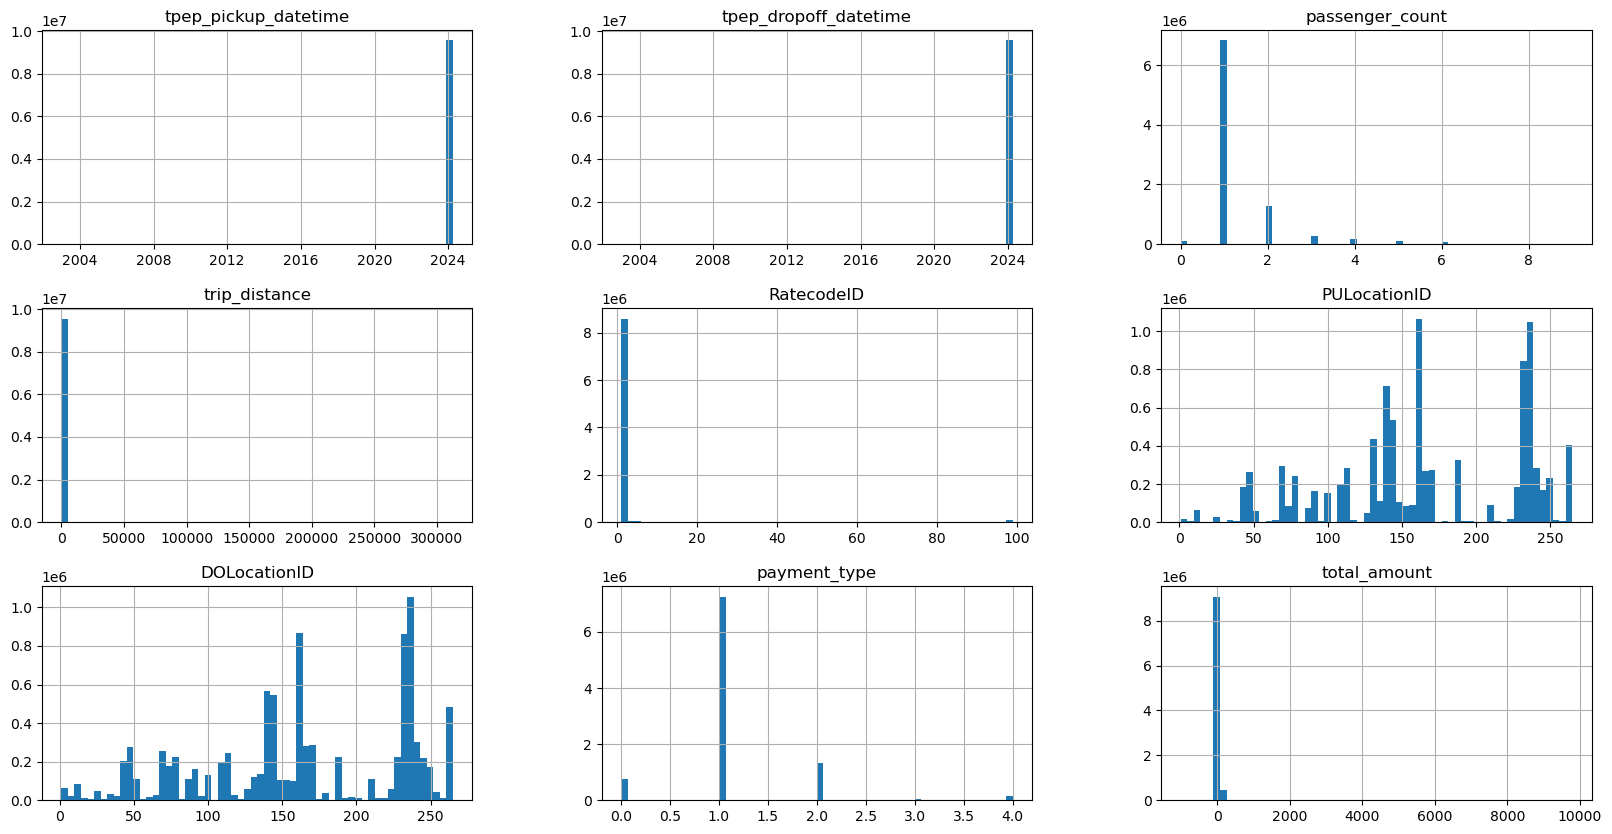

In [34]:
taxi_df.hist(figsize=(20,10),bins=60)

## Rate Code Id  column analysis

In [60]:
print(taxi_df['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0     8294136
NaN      751962
2.0      307735
99.0      96699
5.0       59544
3.0       25391
4.0       19294
6.0          17
Name: count, dtype: int64


In [77]:
taxi_df[taxi_df['RatecodeID']==99 ]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
251,2024-01-01 00:18:26,2024-01-01 00:52:40,1.0,0.0,99.0,222,147,1,60.94
1743,2024-01-01 00:13:45,2024-01-01 00:22:08,1.0,0.0,99.0,263,140,1,19.00
1922,2024-01-01 00:38:11,2024-01-01 01:23:26,1.0,0.0,99.0,41,188,1,57.94
2495,2024-01-01 00:43:55,2024-01-01 01:24:52,1.0,10.2,99.0,215,201,1,40.60
4539,2024-01-01 00:23:54,2024-01-01 00:50:41,1.0,0.0,99.0,242,50,1,40.00
...,...,...,...,...,...,...,...,...,...
3150225,2024-03-31 21:41:40,2024-03-31 22:32:31,1.0,15.9,99.0,16,117,1,59.00
3150593,2024-03-31 21:20:48,2024-03-31 22:16:52,1.0,19.3,99.0,247,39,1,65.94
3151722,2024-03-31 22:03:17,2024-03-31 22:54:49,1.0,0.0,99.0,61,116,1,57.00
3152348,2024-03-31 22:14:18,2024-03-31 22:29:15,1.0,6.0,99.0,241,152,1,36.00


In [78]:
taxi_df[taxi_df['RatecodeID'].isna()]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
2824462,2024-01-01 00:34:19,2024-01-01 00:51:22,NaN,2.04,NaN,143,141,0,16.72
2824463,2024-01-01 00:14:31,2024-01-01 00:19:29,NaN,1.60,NaN,236,238,0,17.16
2824464,2024-01-01 00:35:11,2024-01-01 01:13:40,NaN,0.00,NaN,142,79,0,25.01
2824465,2024-01-01 00:33:37,2024-01-01 00:50:34,NaN,0.00,NaN,237,4,0,21.79
2824466,2024-01-01 00:49:04,2024-01-01 01:01:16,NaN,0.00,NaN,244,50,0,38.65
...,...,...,...,...,...,...,...,...,...
3582623,2024-03-31 23:16:45,2024-03-31 23:29:20,NaN,4.27,NaN,130,218,0,15.77
3582624,2024-03-31 23:29:28,2024-03-31 23:43:47,NaN,0.00,NaN,79,100,0,24.80
3582625,2024-03-31 23:15:00,2024-03-31 23:47:29,NaN,6.44,NaN,63,181,0,31.50
3582626,2024-03-31 23:27:53,2024-03-31 23:45:44,NaN,3.88,NaN,161,148,0,31.58


###### Checking relation with trip distance

In [90]:
taxi_df[taxi_df['RatecodeID'].isna()]['trip_distance'].value_counts()

trip_distance
0.00        101379
1.30          5911
1.40          5702
1.20          5614
1.10          5535
             ...  
29.41            1
24.36            1
28339.60         1
22.14            1
23.69            1
Name: count, Length: 2768, dtype: int64

<Axes: >

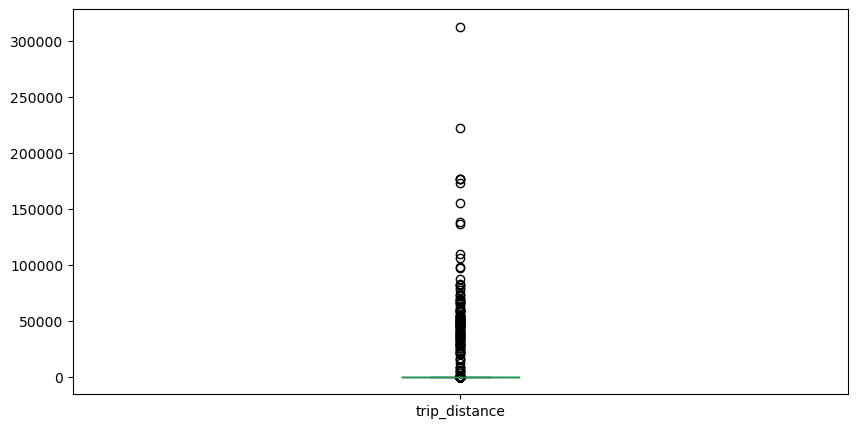

In [80]:
taxi_df[taxi_df['RatecodeID'].isna()].reset_index().plot(kind='box' , y='trip_distance', x='index', figsize=(10,5))

In [81]:
taxi_df[taxi_df['RatecodeID'].isna()]['total_amount'].value_counts()

total_amount
10.83     14590
18.89      6158
3.00       5944
1.00       4222
14.16      3847
          ...  
134.74        1
81.43         1
129.20        1
117.48        1
74.84         1
Name: count, Length: 11308, dtype: int64

<Axes: >

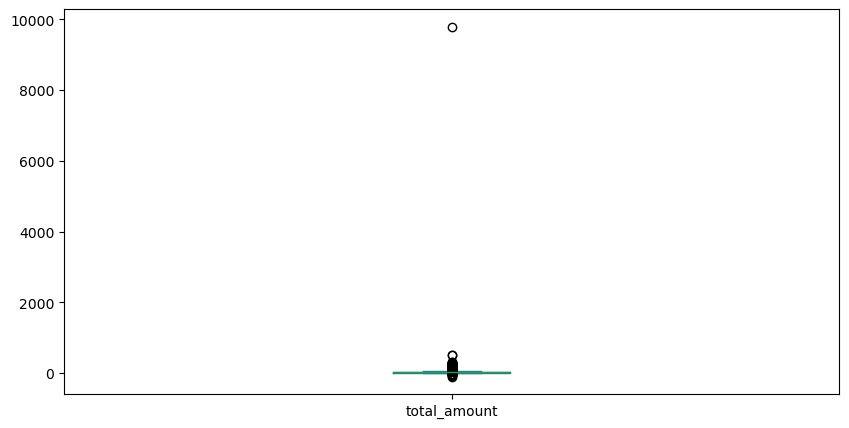

In [82]:
taxi_df[taxi_df['RatecodeID'].isna()].reset_index().plot(kind='box' , y='total_amount', x='index', figsize=(10,5))

In [83]:
taxi_df[taxi_df['RatecodeID'].isna()]['payment_type'].value_counts()

payment_type
0    751962
Name: count, dtype: int64

* It is better to drop corresponding rows where RatecodeId=99 as most of the trip distances are 0 and also null values as payment type is 0 which is not defined

## Total Amount

<Axes: >

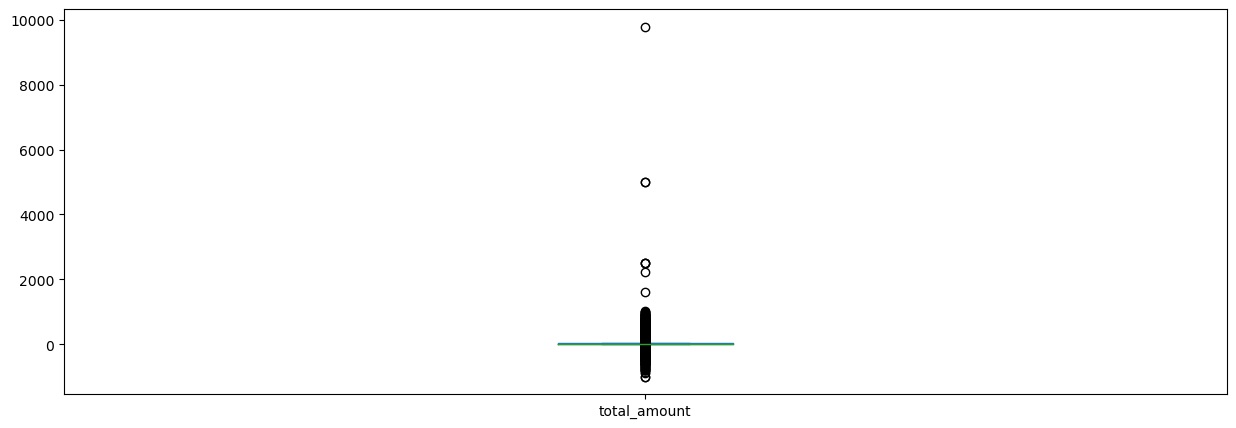

In [116]:
taxi_df['total_amount'].reset_index().plot(kind='box' , y='total_amount', x='index', figsize=(15,5))

<Axes: xlabel='index', ylabel='total_amount'>

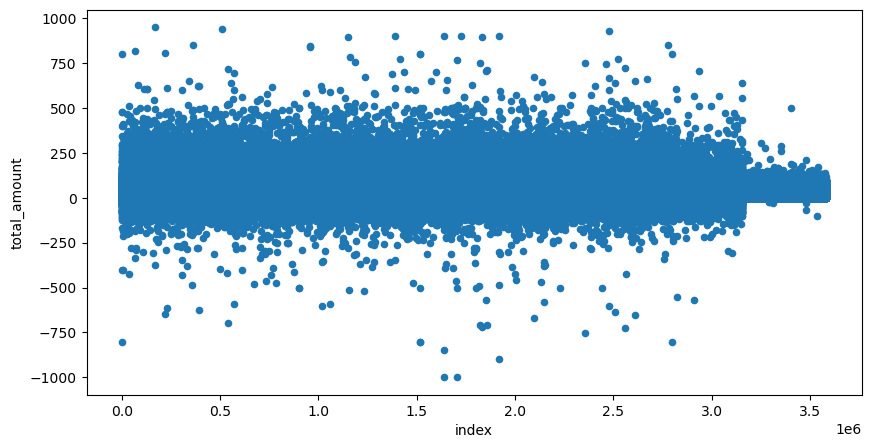

In [36]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter' , y='total_amount', x='index', figsize=(10,5))

In [37]:
taxi_df[taxi_df['total_amount']<0].shape

(115895, 9)

In [38]:
taxi_df[taxi_df['total_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,249,232,4,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,63,63,2,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,249,113,4,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,107,61,2,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,90,225,4,-52.80
...,...,...,...,...,...,...,...,...,...
3290437,2024-03-11 15:18:00,2024-03-11 15:20:00,NaN,0.11,NaN,226,226,0,-25.60
3311422,2024-03-13 21:20:18,2024-03-13 21:38:23,NaN,3.39,NaN,246,237,0,-26.44
3477251,2024-03-25 15:57:50,2024-03-25 17:28:35,NaN,15.38,NaN,138,138,0,-68.52
3481004,2024-03-26 05:23:41,2024-03-26 05:39:39,NaN,3.60,NaN,143,249,0,-28.88


<Axes: xlabel='index', ylabel='total_amount'>

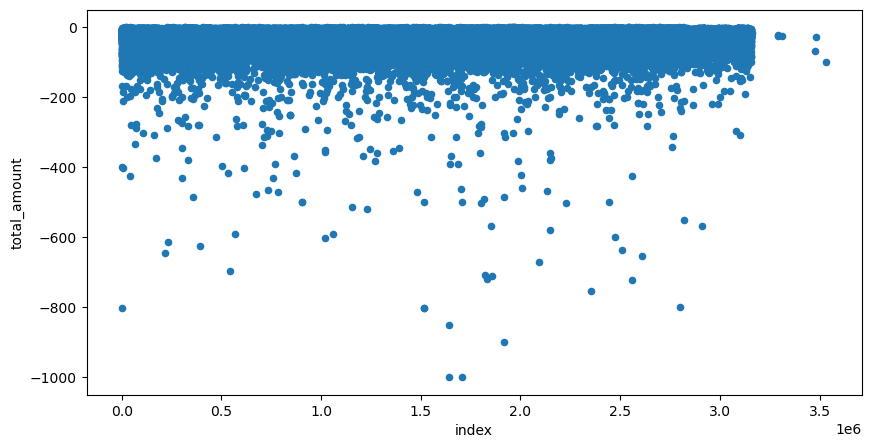

In [89]:
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter' , y='total_amount', x='index', figsize=(10,5))

In [92]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts(dropna=False)

payment_type
4    69970
2    27543
3    18284
1       87
0       11
Name: count, dtype: int64

In [101]:
taxi_df[taxi_df['total_amount']<0]['passenger_count'].value_counts(dropna=False)

passenger_count
1.0    88903
2.0    18550
3.0     4379
4.0     3614
5.0      307
6.0      109
0.0       20
NaN       11
8.0        2
Name: count, dtype: int64

In [103]:
taxi_df[taxi_df['total_amount']<0]['RatecodeID'].value_counts(dropna=False)

RatecodeID
1.0    104181
2.0      7479
5.0      2357
3.0      1090
4.0       774
NaN        11
6.0         3
Name: count, dtype: int64

In [104]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].value_counts(dropna=False)

trip_distance
0.00     10454
0.01      2046
0.02      1407
0.03      1093
0.04       746
         ...  
23.52        1
24.59        1
29.34        1
80.93        1
26.36        1
Name: count, Length: 2949, dtype: int64

* Delete the negative total amount

In [105]:
print(taxi_df[taxi_df['total_amount'] == 0].shape[0])

1292


In [111]:
taxi_df[taxi_df['total_amount'] == 0]['payment_type'].value_counts(dropna=False)

payment_type
4    489
1    324
3    225
2    192
0     62
Name: count, dtype: int64

In [112]:
taxi_df[taxi_df['total_amount'] == 0]['trip_distance'].value_counts(dropna=False)

trip_distance
0.0     891
0.1      53
0.5      33
0.2      24
0.7      22
       ... 
2.9       1
17.1      1
7.0       1
14.7      1
6.7       1
Name: count, Length: 80, dtype: int64

* Delete the rows with total amount =0 as most of the trip distance corresponding to them are 0 and disputes have occured

<Axes: xlabel='index', ylabel='total_amount'>

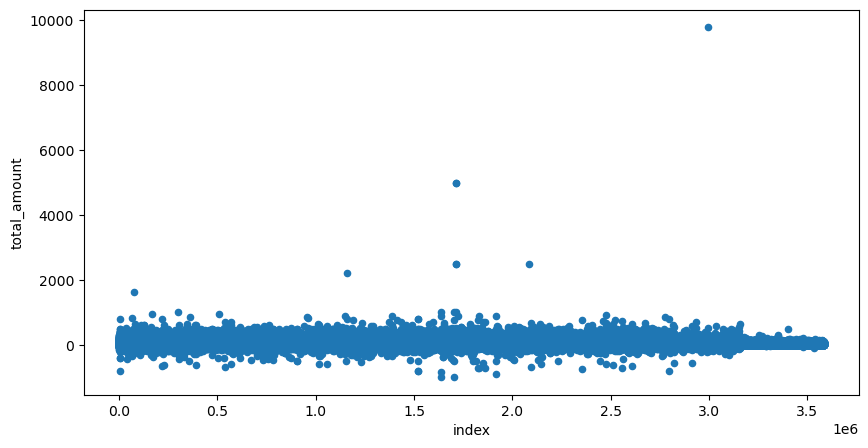

In [113]:
taxi_df['total_amount'].reset_index().plot(kind='scatter' , y='total_amount', x='index', figsize=(10,5))

In [228]:
taxi_df[taxi_df['total_amount']>300].shape

(1492, 9)

In [229]:
taxi_df[taxi_df['total_amount']>300]['trip_distance'].value_counts()

trip_distance
0.00      275
0.10        8
0.05        5
0.01        5
40.40       4
         ... 
111.95      1
52.06       1
34.40       1
53.62       1
194.65      1
Name: count, Length: 1048, dtype: int64

## Trip Distance

<Axes: >

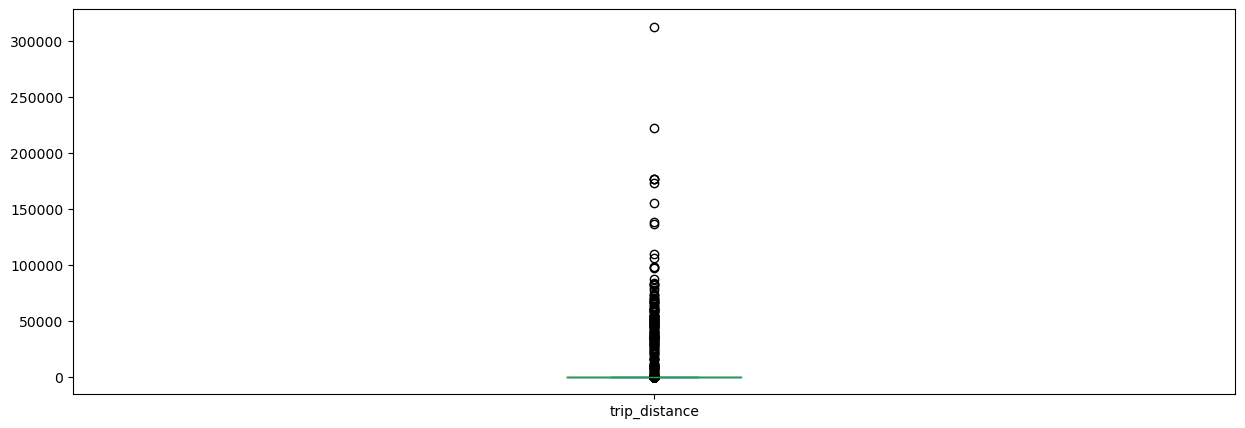

In [193]:
taxi_df['trip_distance'].reset_index().plot(kind='box' , y='trip_distance', x='index', figsize=(15,5))

<Axes: xlabel='index', ylabel='trip_distance'>

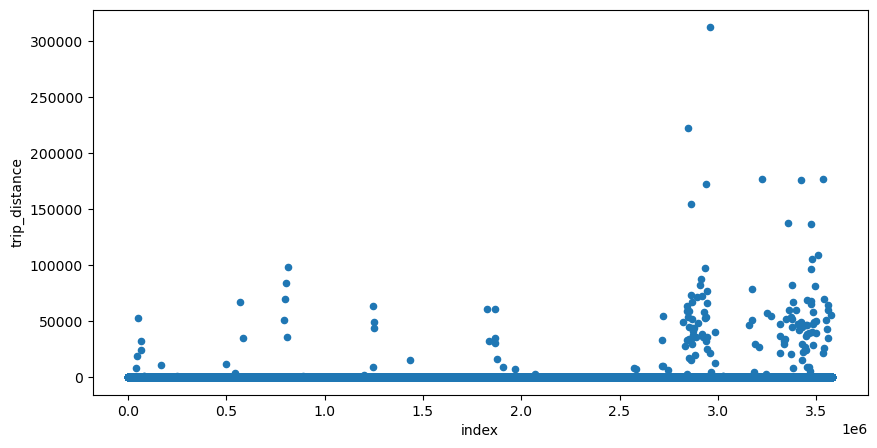

In [197]:
taxi_df['trip_distance'].reset_index().plot(kind='scatter' , y='trip_distance', x='index', figsize=(10,5))

In [224]:
taxi_df[taxi_df['trip_distance']>50].shape

(1263, 9)

* Delete those rows with total distance greater than 50 and whose distnace is 0

# Data Cleaning 

In [262]:
taxi_df_filtered= taxi_df[(taxi_df['total_amount']>0)]

In [263]:
taxi_df_filtered= taxi_df_filtered[(taxi_df_filtered['RatecodeID']!=99) & (~taxi_df_filtered['RatecodeID'].isna())]

In [264]:
taxi_df_filtered= taxi_df_filtered[(taxi_df_filtered['trip_distance']!=0) & (taxi_df_filtered['trip_distance']<=50)]

In [265]:
taxi_df_filtered= taxi_df_filtered[(taxi_df_filtered['total_amount']<=240) ]

In [267]:
taxi_df_filtered= taxi_df_filtered[(taxi_df_filtered['payment_type']>0) ]

In [268]:
taxi_df_filtered = taxi_df_filtered[taxi_df['tpep_pickup_datetime'].dt.year >= 2024]

C:\Users\Vaishnav V K\AppData\Local\Temp\ipykernel_11680\1965707940.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_df_filtered = taxi_df_filtered[taxi_df['tpep_pickup_datetime'].dt.year >= 2024]


IndexError: indices are out-of-bounds

In [269]:
taxi_df_filtered.shape

(8488099, 9)

In [270]:
taxi_df_filtered.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
count,8488099,8488099,8.488099e+06,8.488099e+06,8.488099e+06,8.488099e+06,8.488099e+06,8.488099e+06,8.488099e+06
mean,2024-02-16 19:04:18.640196096,2024-02-16 19:20:12.269283840,1.338220e+00,3.228415e+00,1.058407e+00,1.663464e+02,1.653449e+02,1.184789e+00,2.751426e+01
min,2002-12-31 22:17:10,2002-12-31 22:42:24,0.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2024-01-25 15:48:31.500000,2024-01-25 16:07:07,1.000000e+00,1.010000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,1.560000e+01
50%,2024-02-17 00:53:45,2024-02-17 01:06:38,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,2.016000e+01
75%,2024-03-10 01:34:28,2024-03-10 01:49:10.500000,1.000000e+00,3.100000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.890000e+01
max,2024-04-01 00:34:55,2024-04-02 09:10:04,9.000000e+00,4.997000e+01,6.000000e+00,2.650000e+02,2.650000e+02,4.000000e+00,2.400000e+02
std,NaN,NaN,8.461219e-01,4.264888e+00,3.318165e-01,6.303066e+01,6.902972e+01,4.597519e-01,2.128940e+01


<Axes: xlabel='index', ylabel='total_amount'>

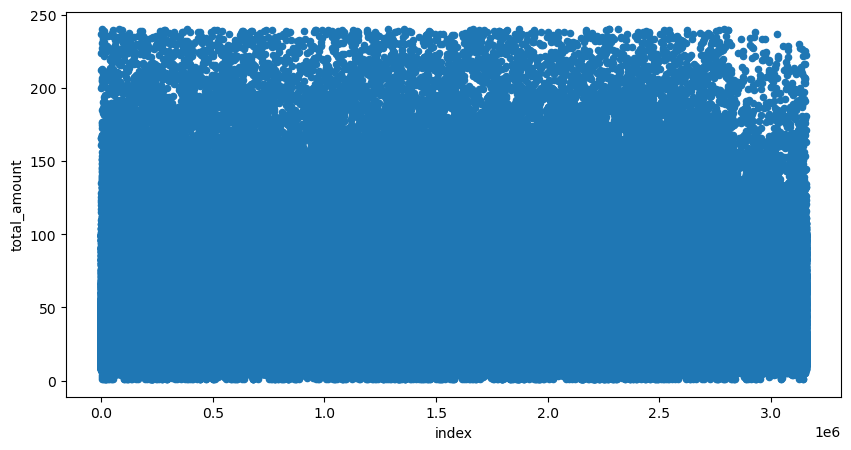

In [251]:
taxi_df_filtered['total_amount'].reset_index().plot(kind='scatter' , y='total_amount', x='index', figsize=(10,5))

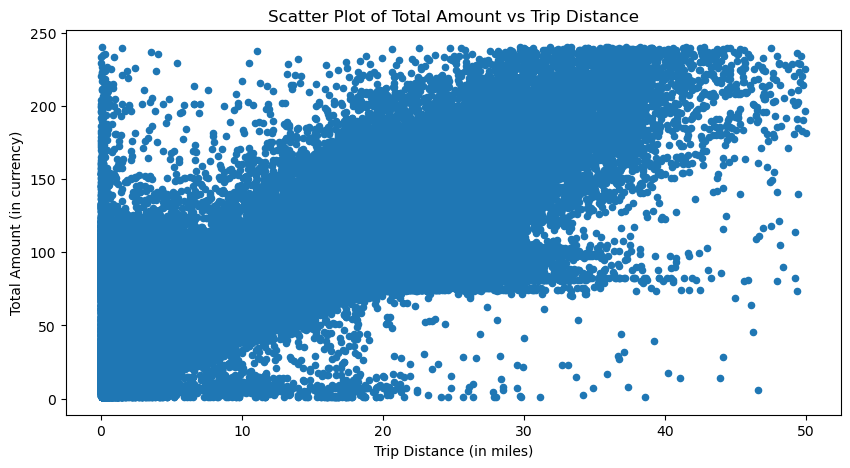

In [253]:
taxi_df_filtered.reset_index().plot(kind='scatter', x='trip_distance', y='total_amount', figsize=(10, 5))

# Set title and labels
plt.title('Scatter Plot of Total Amount vs Trip Distance')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Total Amount (in currency)')

# Set x and y limits
#plt.xlim(0, 300)  # Set x-axis limit from 0 to 200
#plt.ylim(0, 1000)  # Set y-axis limit from 0 to 200

# Show the plot
plt.show()

In [254]:
taxi_df_filtered.isnull().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

 # Data Preparation
 

In [255]:
taxi_df_prepared=taxi_df_filtered.copy()

In [256]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [257]:
taxi_df_prepared.loc[:,'RatecodeID']= taxi_df_prepared['RatecodeID'].astype(str)
taxi_df_prepared.loc[:,'PULocationID']= taxi_df_prepared['PULocationID'].astype(str)
taxi_df_prepared.loc[:,'DOLocationID'] = taxi_df_prepared['DOLocationID'].astype(str)
taxi_df_prepared.loc[:,'payment_type'] = taxi_df_prepared['payment_type'].astype(str)

In [258]:
taxi_df_prepared.dtypes

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object